In [1]:
import apw_path
import plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [2]:
path1, poles, pole_names, pole_colors = apw_path.create_model(0, True)
apw_path.load_or_sample_model(path1)

path2, _, _, _ = apw_path.create_model(1, False)
apw_path.load_or_sample_model(path2)

path3, _, _, _ = apw_path.create_model(1, True)
apw_path.load_or_sample_model(path3)

path4, _, _, _ = apw_path.create_model(2, False)
apw_path.load_or_sample_model(path4)

path5, _, _, _ = apw_path.create_model(2, True)
apw_path.load_or_sample_model(path5)

Fitting Keweenawan APW track with TPW and 0 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 1 Euler rotation
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track without TPW and 2 Euler rotations
Loading MCMC results from disk...
Done
Fitting Keweenawan APW track with TPW and 2 Euler rotations
Loading MCMC results from disk...
Done


Rotation 0: median 14.780784, credible interval  [ 13.68910567  15.8659805 ]
Rotation 0: median 2.926601, credible interval  [  1.35026980e-05   1.22493009e+01]
Rotation 1: median 28.362425, credible interval  [ 18.46675005  35.67702125]
Rotation 0: median 28.533594, credible interval  [ 22.68560799  36.91834779]
Rotation 1: median 18.720649, credible interval  [ 10.58269164  31.43958328]
Rotation 0: median 14.020896, credible interval  [  4.28291709  20.89591283]
Rotation 1: median 17.850644, credible interval  [  7.85113969  28.7029688 ]
Rotation 2: median 4.061495, credible interval  [  4.71312780e-05   1.84833895e+01]


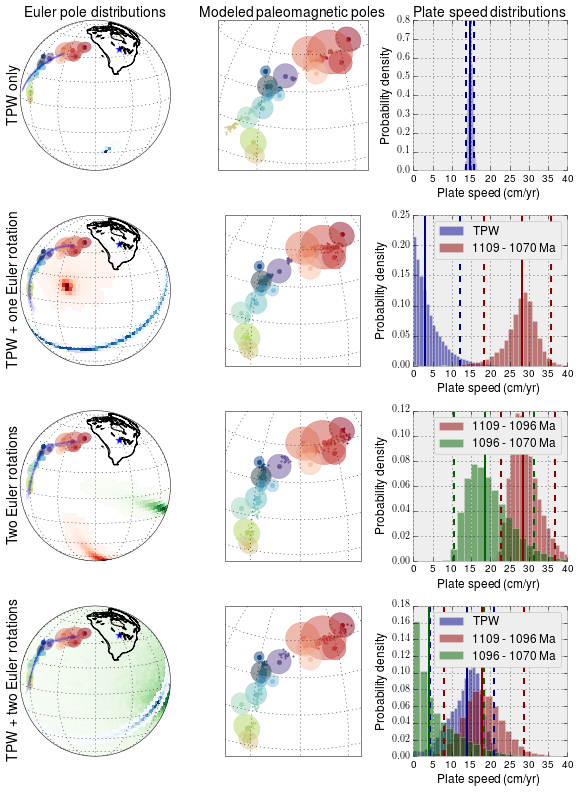

In [3]:
fig = plt.figure(figsize=(8,11))

index = 1
def plot_row(path, title, proj = 'O'):
    global index
    if proj == 'M':
        ax1 = fig.add_subplot(4,3,index, projection = ccrs.Mollweide(240.-apw_path.lon_shift))
    elif proj == 'O':
        ax1 = fig.add_subplot(4,3,index, projection = ccrs.Orthographic(240.-apw_path.lon_shift, 10))
    else:
        raise Exception('Unsupported projection')
        
    ax2 = fig.add_subplot(4,3,index+1, projection = ccrs.Orthographic(200-apw_path.lon_shift,30.))
    ax3 = fig.add_subplot(4,3,index+2)
    plotting.plot_synthetic_paths(path, poles, pole_colors, ax1)
    plotting.plot_synthetic_poles(path, poles, pole_colors, ax2)
    plotting.plot_plate_speeds(path, poles, ax3)
    if index == 1:
        ax1.text(0.5, 1., 'Euler pole distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax1.transAxes)
        ax2.text(0.5, 1., 'Modeled paleomagnetic poles',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax2.transAxes)
        ax3.text(0.5, 1., 'Plate speed distributions',
            horizontalalignment='center',
            verticalalignment='bottom',
            size = 14,
            transform=ax3.transAxes)
    ax1.text(0., 0.5, title,
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        size=14,
        transform=ax1.transAxes)
    index += 3

plot_row(path1, 'TPW only')
plot_row(path3, 'TPW + one Euler rotation')
plot_row(path4, 'Two Euler rotations')
plot_row(path5, 'TPW + two Euler rotations')
fig.tight_layout()
plt.savefig('many_inversions.pdf')
plt.show()

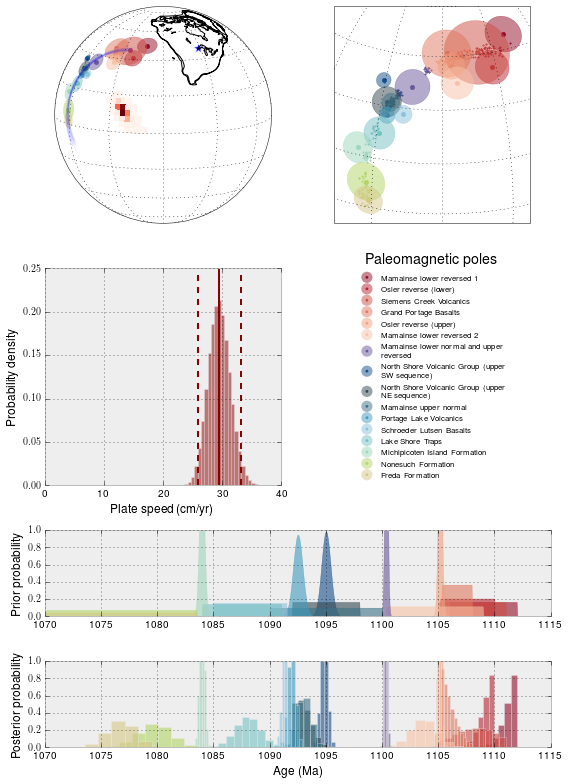

In [11]:
import matplotlib.ticker as ticker
fig.axes[2].xaxis.set_major_locator(ticker.MultipleLocator(10))
fig


Rotation 0: median 29.431412, credible interval  [ 25.85413902  33.18038197]


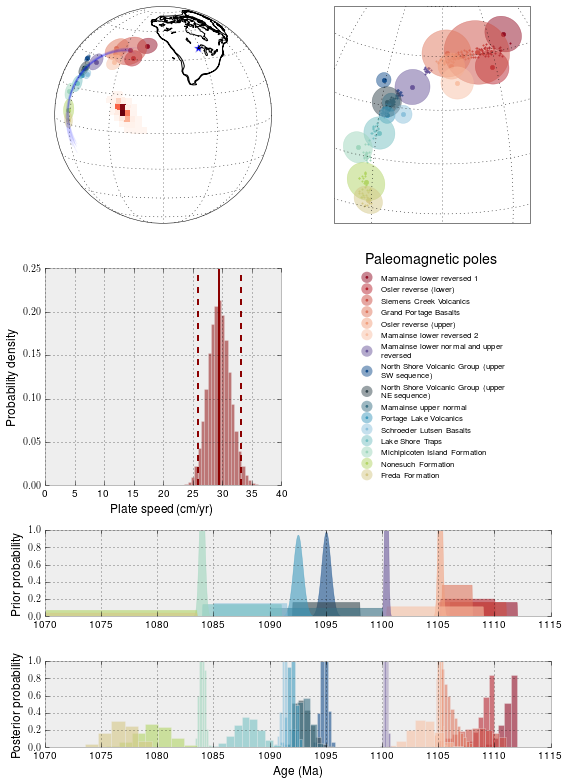

In [4]:
fig = plt.figure( figsize = (8,11) )

ax1 = plt.subplot2grid( (6,4), (0,0), colspan=2, rowspan=2, projection=ccrs.Orthographic(240.-apw_path.lon_shift, 10))
ax2 = plt.subplot2grid( (6,4), (0,2), colspan=2, rowspan=2, projection=ccrs.Orthographic(200-apw_path.lon_shift,30.))        
ax3 = plt.subplot2grid( (6,4), (2,0), colspan=2, rowspan=2 )
ax4 = plt.subplot2grid( (6,4), (2,2), colspan=2, rowspan=2 )
ax5 = plt.subplot2grid( (6,4), (4,0), colspan=4, rowspan=1 )
ax6 = plt.subplot2grid( (6,4), (5,0), colspan=4, rowspan=1)

plotting.plot_synthetic_paths(path2, poles, pole_colors, ax1)
plotting.plot_synthetic_poles(path2, poles, pole_colors, ax2)
plotting.plot_plate_speeds(path2, poles, ax3, '')
plotting.make_legend(pole_names, pole_colors, ax4, 'Paleomagnetic poles')
plotting.plot_age_samples(path2, poles, pole_colors, ax5, ax6)
fig.tight_layout()
plt.savefig('one_euler_pole.pdf')
plt.show()
